In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
df = pd.read_csv('Heart.csv') 

In [18]:
df.shape 

(918, 12)

In [19]:
df.head() 

,wAge,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [20]:
df.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wAge            918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [21]:

df['Sex'] = df['Sex'].replace({'M': 1, 'F': 0})
df['ChestPainType'] = df['ChestPainType'].replace({'ASY': 0 , 'ATA': 1, 'NAP': 2,'TA':3 })
df['RestingECG'] = df['RestingECG'].replace({'LVH': 0 , 'Normal': 1, 'ST': 2})
df['ExerciseAngina'] = df['ExerciseAngina'].replace({'Y': 1 , 'N': 0})
df['ST_Slope'] = df['ST_Slope'].replace({'Down': 0 , 'Up': 1, 'Flat': 2})

C:\Users\karti\AppData\Local\Temp\ipykernel_20656\1840241154.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'M': 1, 'F': 0})
C:\Users\karti\AppData\Local\Temp\ipykernel_20656\1840241154.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ChestPainType'] = df['ChestPainType'].replace({'ASY': 0 , 'ATA': 1, 'NAP': 2,'TA':3 })
C:\Users\karti\AppData\Local\Temp\ipykernel_20656\1840241154.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. 

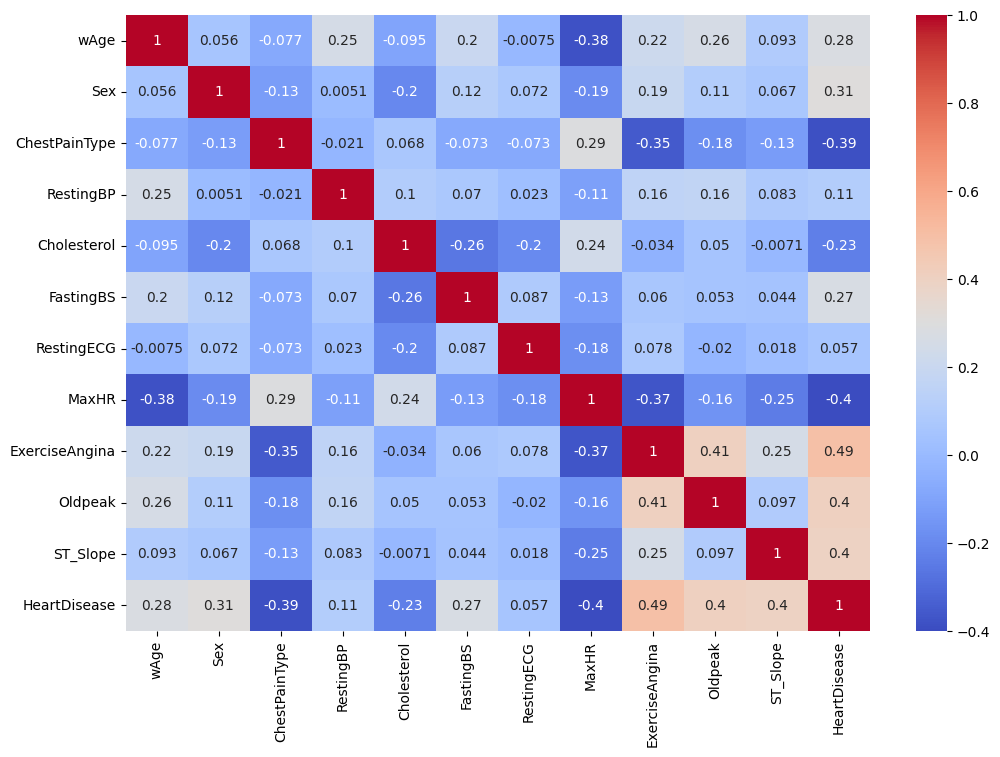

In [22]:

plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## Outliers treatment


### Cholesterol

In [23]:
df.loc[df['Cholesterol'] == 0, 'Cholesterol'] = df['Cholesterol'].median()

In [24]:
lower = 100   
upper = 400   
df['Cholesterol'] = np.clip(df['Cholesterol'], lower, upper)  # Cap values outside the range to lower and upper bounds
#applied the iQR method also but still the lower bound is very low as compared to practical values so used clipping method

RestingBP

In [25]:
df.loc[df['RestingBP'] == 0, 'RestingBP'] = df['RestingBP'].median()

In [26]:
df['RestingBP'] = np.clip(df['RestingBP'], 90, 180) 

OldPeak

In [27]:
df.loc[df['Oldpeak'] < 0, 'Oldpeak'] = 0  # Replace negative values with 0

In [28]:
df['Oldpeak'] = np.clip(df['Oldpeak'], 0, 3.9)

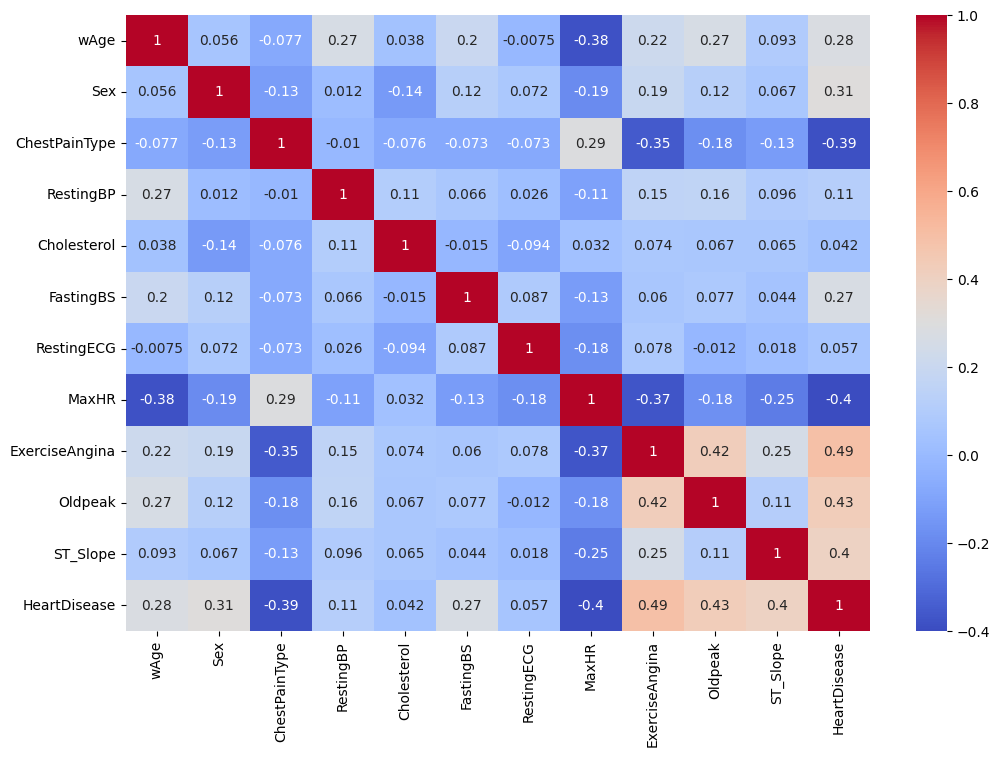

In [29]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [30]:
df.to_csv('cleaned_heart.csv', index=False) #saves the cleaned dataframe to a new csv file